In [4]:
from matplotlib import pyplot as plt 

import random
import time

# Define parameters
population_size = 100  # Number of individuals in the population
chromosome_length = 20  # Length of the binary string
mutation_rate = 0.01  # Probability of mutation
generations = 100  # Number of generations
best_fitness_res = []

# Function to generate a random binary string
def generate_individual():
    return [random.choice([0, 1]) for _ in range(chromosome_length)]

# Function to calculate the fitness of an individual (count of 1s)
def calculate_fitness(individual):
    return sum(individual)

# Function to perform one-point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, chromosome_length - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Function to mutate an individual
def mutate(individual):
    for i in range(chromosome_length):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

# Initialize the population
population = [generate_individual() for _ in range(population_size)]

Generation 1: Best Fitness = 15, Best Individual = [1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
Generation 2: Best Fitness = 15, Best Individual = [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
Generation 3: Best Fitness = 15, Best Individual = [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
Generation 4: Best Fitness = 16, Best Individual = [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Generation 5: Best Fitness = 17, Best Individual = [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
Generation 6: Best Fitness = 17, Best Individual = [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
Generation 7: Best Fitness = 16, Best Individual = [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Generation 8: Best Fitness = 16, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
Generation 9: Best Fitness = 17, Best Individual = [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1

Generation 74: Best Fitness = 20, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Generation 75: Best Fitness = 18, Best Individual = [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Generation 76: Best Fitness = 19, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
Generation 77: Best Fitness = 19, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
Generation 78: Best Fitness = 19, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Generation 79: Best Fitness = 19, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Generation 80: Best Fitness = 19, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Generation 81: Best Fitness = 19, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Generation 82: Best Fitness = 20, Best Individual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

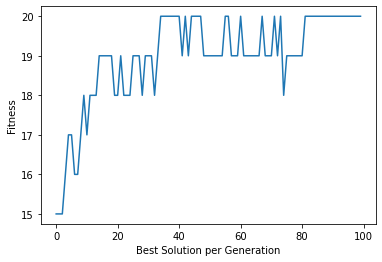

In [5]:
# Main loop
for generation in range(generations):
    # Evaluate the fitness of each individual
    fitness_scores = [calculate_fitness(individual) for individual in population]

    # Select parents for the next generation (roulette wheel selection)
    total_fitness = sum(fitness_scores)
    probabilities = [score / total_fitness for score in fitness_scores]
    parents = random.choices(population, weights=probabilities, k=population_size)

    # Create the next generation through crossover and mutation
    next_generation = []
    for i in range(0, population_size, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        next_generation.extend([child1, child2])

    population = next_generation

    # Find the best individual in this generation
    best_individual = max(population, key=calculate_fitness)
    best_fitness = calculate_fitness(best_individual)

    # Print the best individual and its fitness for each generation
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}, Best Individual = {best_individual}")
    time.sleep(0.2)
    best_fitness_res.append(best_fitness)
    
# Find the overall best individual
overall_best_individual = max(population, key=calculate_fitness)
overall_best_fitness = calculate_fitness(overall_best_individual)

print(f"Overall Best Fitness = {overall_best_fitness}, Overall Best Individual = {overall_best_individual}")

plt.plot(best_fitness_res)
plt.ylabel('Fitness')
plt.xlabel('Best Solution per Generation')
plt.show()